# Analysis of Literacy Rates by Religion in Rural and Urban India for Six Different Zones (Age 7 and above*)(2011)

## Target
The objective of this analysis is to visualize the literacy rates for various religions across six different zones in India in the year 2011 and compare them to the national average literacy rate across all religions.

## Formula for Calculating Literacy Rate
The literacy rate for each religion is calculated using the following formula:

**`Literacy Rate (%) = (Number of Literates in Religion (7 and above) / Total Population of Religion (7 and above)) * 100`**

## Data Source
The data used for this analysis is sourced from the Census of India 2011. The original data can be downloaded from the [Census website](https://censusindia.gov.in/census.website/data/census-tables), or you can also find that file on our [GitHub repository](https://github.com/Shubham18024/Census_Analysis/blob/main/CSV%20files%20for%201991%2C2001%2C2011/DDW-0000C-09-PC11C-09.xlsx).

## Refined and Specific Data
The data has been refined and specified to focus on the literacy rates of different religions in rural and urban areas of six different zones in India. The refined and specific data, along with all the raw data used for this analysis, can be found on GitHub in a dedicated folder: [Refined Census Data](https://github.com/Shubham18024/Census_Analysis/tree/main/CSV%20files%20for%201991%2C2001%2C2011/All_Zone_Literacy_Data).

## Visualization
Below is the code to generate a grouped bar chart to visualize the `literacy rates for different religions in rural and urban areas of six different zones in India`, along with a comparison to the national average literacy rate.

`*It also includes age not stated`


# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

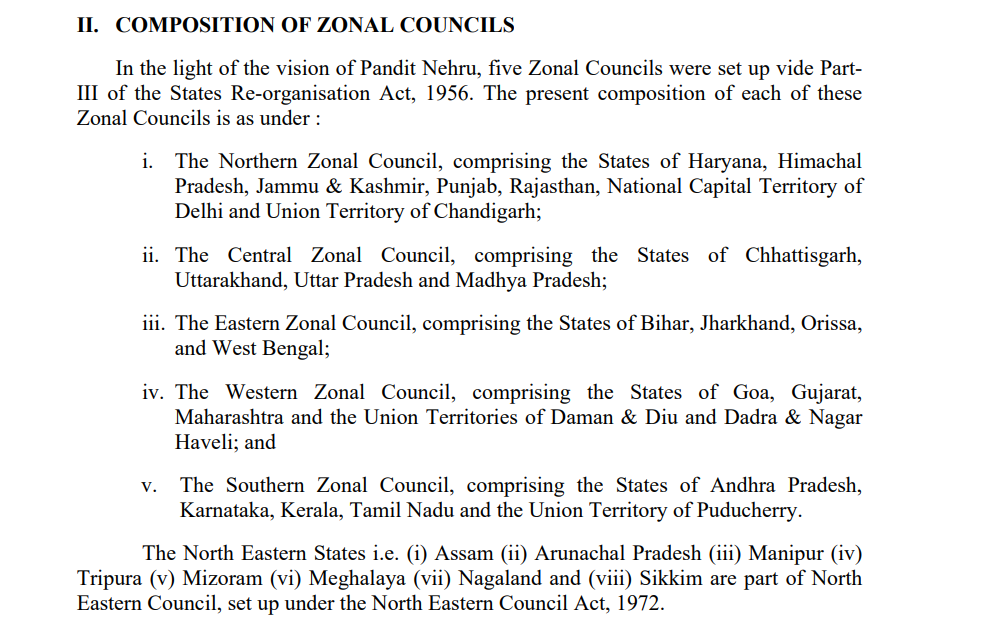

In [8]:
#Zones
from IPython.display import Image, display

image_path = r"C:\Users\saim\Just_one_for_all\Pictures\Screenshots\Screenshot 2024-07-19 083606.png"
display(Image(filename=image_path))


# Analysis of Rural and Urban Population by Religion for `Northern ZONE` (Age 7 and above*)


In [3]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Northern_Zone_Raw.csv")
print(df["State"].value_counts())
df

State
JAMMU & KASHMIR     266
HIMACHAL PRADESH    266
PUNJAB              266
CHANDIGARH          266
HARYANA             266
NCT OF DELHI        266
RAJASTHAN           266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,1,Rural,JAMMU & KASHMIR,Hindu,7,50775,38381
1,1,Rural,JAMMU & KASHMIR,Hindu,8,49764,44201
2,1,Rural,JAMMU & KASHMIR,Hindu,9,46438,43072
3,1,Rural,JAMMU & KASHMIR,Hindu,10,52188,48270
4,1,Rural,JAMMU & KASHMIR,Hindu,11,51420,48516
...,...,...,...,...,...,...,...
1857,8,Urban,RAJASTHAN,Other religions and persuasions,25-29,118,105
1858,8,Urban,RAJASTHAN,Other religions and persuasions,30-34,108,91
1859,8,Urban,RAJASTHAN,Other religions and persuasions,35-59,341,284
1860,8,Urban,RAJASTHAN,Other religions and persuasions,60+,118,99


## Filtering out Specific data

In [22]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,63613037,42549714,66.89,9117884,5161129,56.60,283560,180032,63.49,...,70.75,163473,118117,72.25,158242,144644,91.41,11193,7283,65.07
1,Urban,38268426,32295894,84.39,6838334,4838792,70.76,329883,291185,88.27,...,85.52,72248,60168,83.28,652349,630934,96.72,8730,7466,85.52


### Saving filtered data

In [18]:
output_file_path = "Northern_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to Northern_Zone_Specific.csv


### Analysis

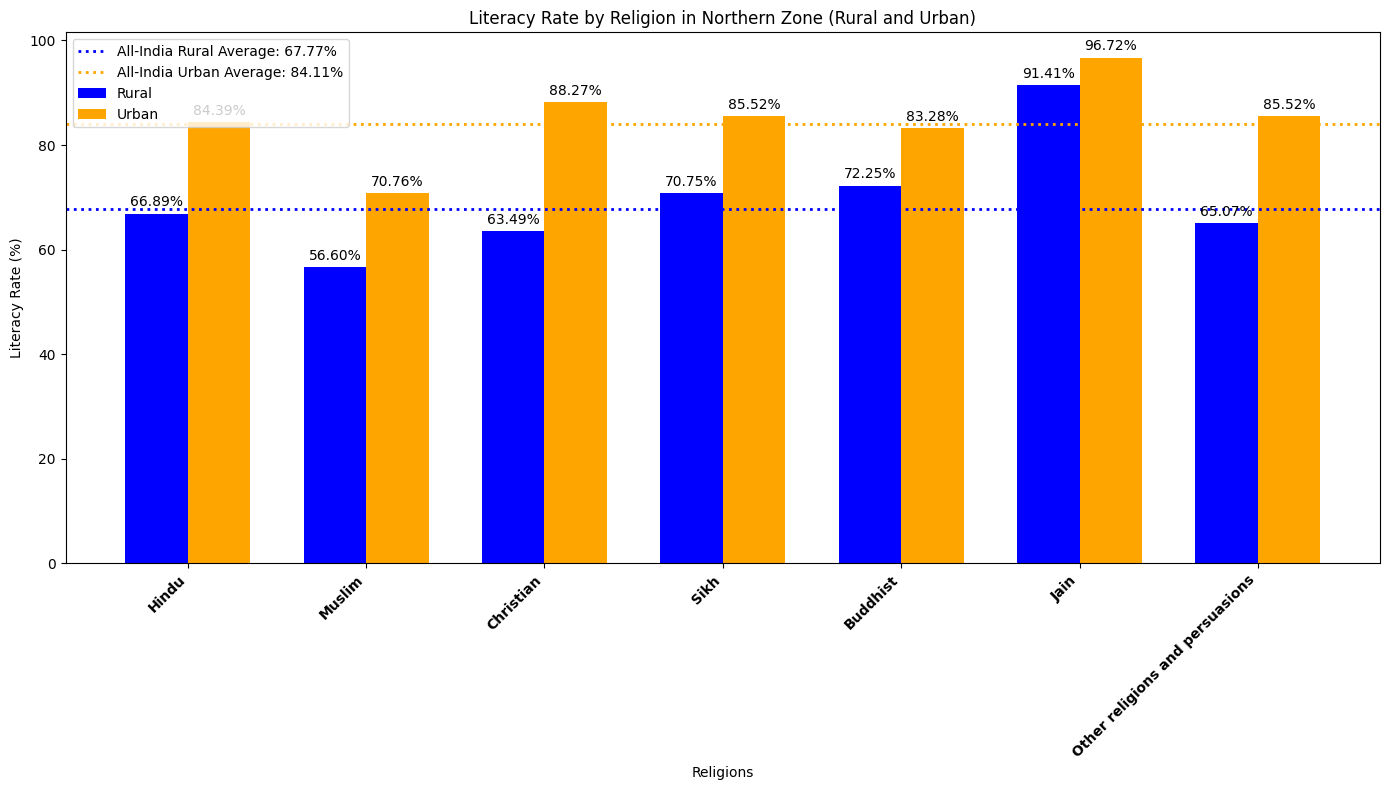

In [23]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Central ZONE` (Age 7 and above*)


In [8]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Central_Zone_Raw.csv")
print(df["State"].value_counts())
df

State
UTTARAKHAND       266
UTTAR PRADESH     266
CHHATTISGARH      266
MADHYA PRADESH    266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,5,Rural,UTTARAKHAND,Hindu,7,127131,101930
1,5,Rural,UTTARAKHAND,Hindu,8,129475,119920
2,5,Rural,UTTARAKHAND,Hindu,9,123335,116565
3,5,Rural,UTTARAKHAND,Hindu,10,148835,139589
4,5,Rural,UTTARAKHAND,Hindu,11,133500,128843
...,...,...,...,...,...,...,...
1059,23,Urban,MADHYA PRADESH,Other religions and persuasions,25-29,629,566
1060,23,Urban,MADHYA PRADESH,Other religions and persuasions,30-34,564,483
1061,23,Urban,MADHYA PRADESH,Other religions and persuasions,35-59,2056,1527
1062,23,Urban,MADHYA PRADESH,Other religions and persuasions,60+,614,402


## Filtering out Specific data

In [9]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,172502489,114603621,66.44,21886136,12633713,57.72,552085,383063,69.38,...,73.62,291284,211185,72.50,130959,120220,91.80,911710,552756,60.63
1,Urban,46739984,38433266,82.23,15667668,10250778,65.43,406301,361282,88.92,...,92.61,148667,125590,84.48,640246,618340,96.58,25659,19295,75.20


### Saving filtered data

In [11]:
output_file_path = "Central_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to All_Zone_Literacy_Data/Central_Zone_Specific.csv


### Analysis

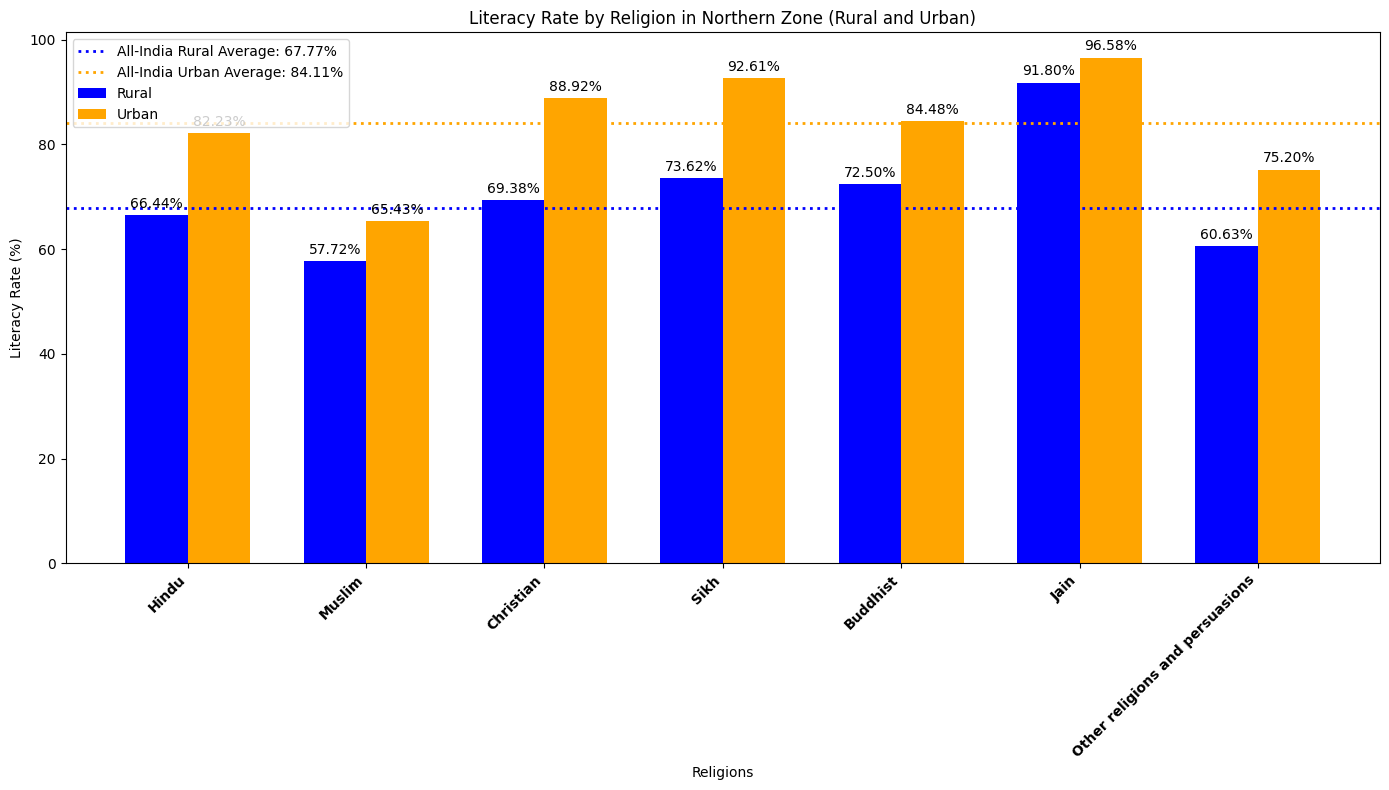

In [12]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Eastern ZONE` (Age 7 and above*)


In [6]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Eastern_Zone_Raw.csv")
print(df['State'].value_counts())
df

State
BIHAR          266
WEST BENGAL    266
JHARKHAND      266
ODISHA         266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,10,Rural,BIHAR,Hindu,7,2027071,1299635
1,10,Rural,BIHAR,Hindu,8,2578443,1981461
2,10,Rural,BIHAR,Hindu,9,1829215,1485529
3,10,Rural,BIHAR,Hindu,10,2862581,2335947
4,10,Rural,BIHAR,Hindu,11,1765478,1494738
...,...,...,...,...,...,...,...
1059,21,Urban,ODISHA,Other religions and persuasions,25-29,1389,1013
1060,21,Urban,ODISHA,Other religions and persuasions,30-34,1200,790
1061,21,Urban,ODISHA,Other religions and persuasions,35-59,4105,2266
1062,21,Urban,ODISHA,Other religions and persuasions,60+,856,259


## Filtering out Specific data

In [7]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,141685444,94129352,66.44,31450768,19484608,61.95,2346781,1576091,67.16,...,74.83,202362,156618,77.39,21496,16825,78.27,4404285,2459546,55.84
1,Urban,39925590,33866696,84.82,8202680,6028694,73.50,552601,491806,89.00,...,92.89,97518,87039,89.25,71826,69065,96.16,341064,247783,72.65


### Saving filtered data

In [8]:
output_file_path = "Eastern_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to Eastern_Zone_Specific.csv


### Analysis

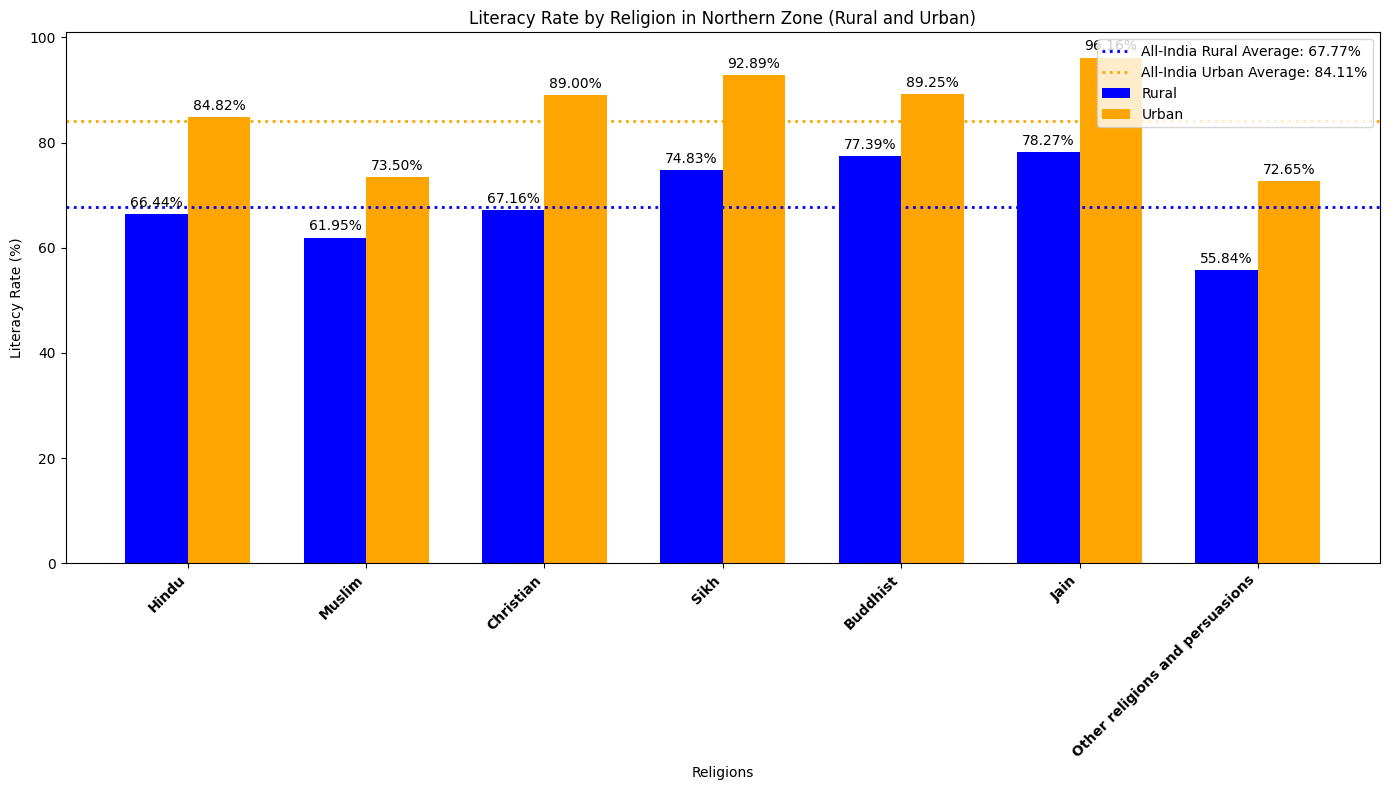

In [9]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Western ZONE` (Age 7 and above*)


In [3]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Western_Zone_Raw.csv")
print(df['State'].value_counts())
df

State
GUJARAT                 266
DAMAN & DIU             266
DADRA & NAGAR HAVELI    266
MAHARASHTRA             266
GOA                     266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,24,Rural,GUJARAT,Hindu,7,686132,534002
1,24,Rural,GUJARAT,Hindu,8,689131,616413
2,24,Rural,GUJARAT,Hindu,9,658292,612230
3,24,Rural,GUJARAT,Hindu,10,756737,699605
4,24,Rural,GUJARAT,Hindu,11,711254,672208
...,...,...,...,...,...,...,...
1325,30,Urban,GOA,Other religions and persuasions,25-29,19,14
1326,30,Urban,GOA,Other religions and persuasions,30-34,11,10
1327,30,Urban,GOA,Other religions and persuasions,35-59,72,71
1328,30,Urban,GOA,Other religions and persuasions,60+,29,25


## Filtering out Specific data

In [4]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,75750105,56607078,74.73,4745295,3717639,78.34,369271,299458,81.09,...,80.25,3014768,2385985,79.14,286767,261592,91.22,87111,62106,71.30
1,Urban,51551300,45521936,88.30,11505841,9727082,84.54,1243638,1156884,93.02,...,91.70,2804544,2453159,87.47,1533963,1483199,96.69,90032,82679,91.83


### Saving filtered data

In [5]:
output_file_path = "Western_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to Western_Zone_Specific.csv


### Analysis

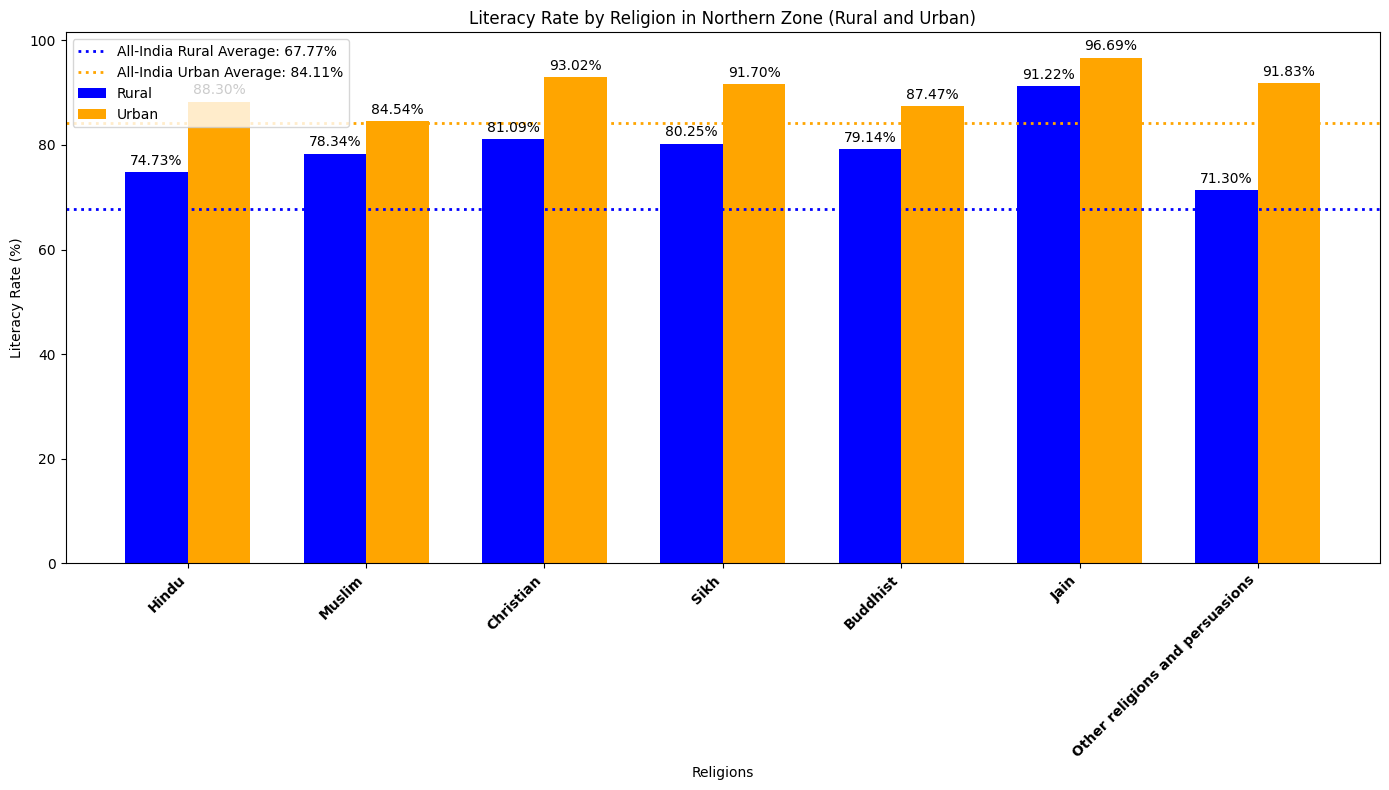

In [6]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Southern ZONE` (Age 7 and above*)


In [2]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Southern_Zone_Raw.csv")
print(df['State'].value_counts())
df

State
ANDHRA PRADESH    266
KARNATAKA         266
KERALA            266
TAMIL NADU        266
PUDUCHERRY        266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,28,Rural,ANDHRA PRADESH,Hindu,7,938341,663691
1,28,Rural,ANDHRA PRADESH,Hindu,8,960137,833820
2,28,Rural,ANDHRA PRADESH,Hindu,9,929234,854961
3,28,Rural,ANDHRA PRADESH,Hindu,10,1115935,1033238
4,28,Rural,ANDHRA PRADESH,Hindu,11,973531,922229
...,...,...,...,...,...,...,...
1325,34,Urban,PUDUCHERRY,Other religions and persuasions,25-29,11,11
1326,34,Urban,PUDUCHERRY,Other religions and persuasions,30-34,17,16
1327,34,Urban,PUDUCHERRY,Other religions and persuasions,35-59,40,39
1328,34,Urban,PUDUCHERRY,Other religions and persuasions,60+,22,17


## Filtering out Specific data

In [3]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,116772301,79287669,67.90,9467320,7502489,79.25,5593896,5062713,90.5,...,71.08,88545,63302,71.49,213795,175888,82.27,13122,9827,74.89
1,Urban,70004813,59905807,85.57,15721621,13441738,85.50,6096004,5712246,93.7,...,86.35,43056,36356,84.44,315617,298879,94.70,18499,15727,85.02


### Saving filtered data

In [4]:
output_file_path = "Southern_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to Southern_Zone_Specific.csv


### Analysis

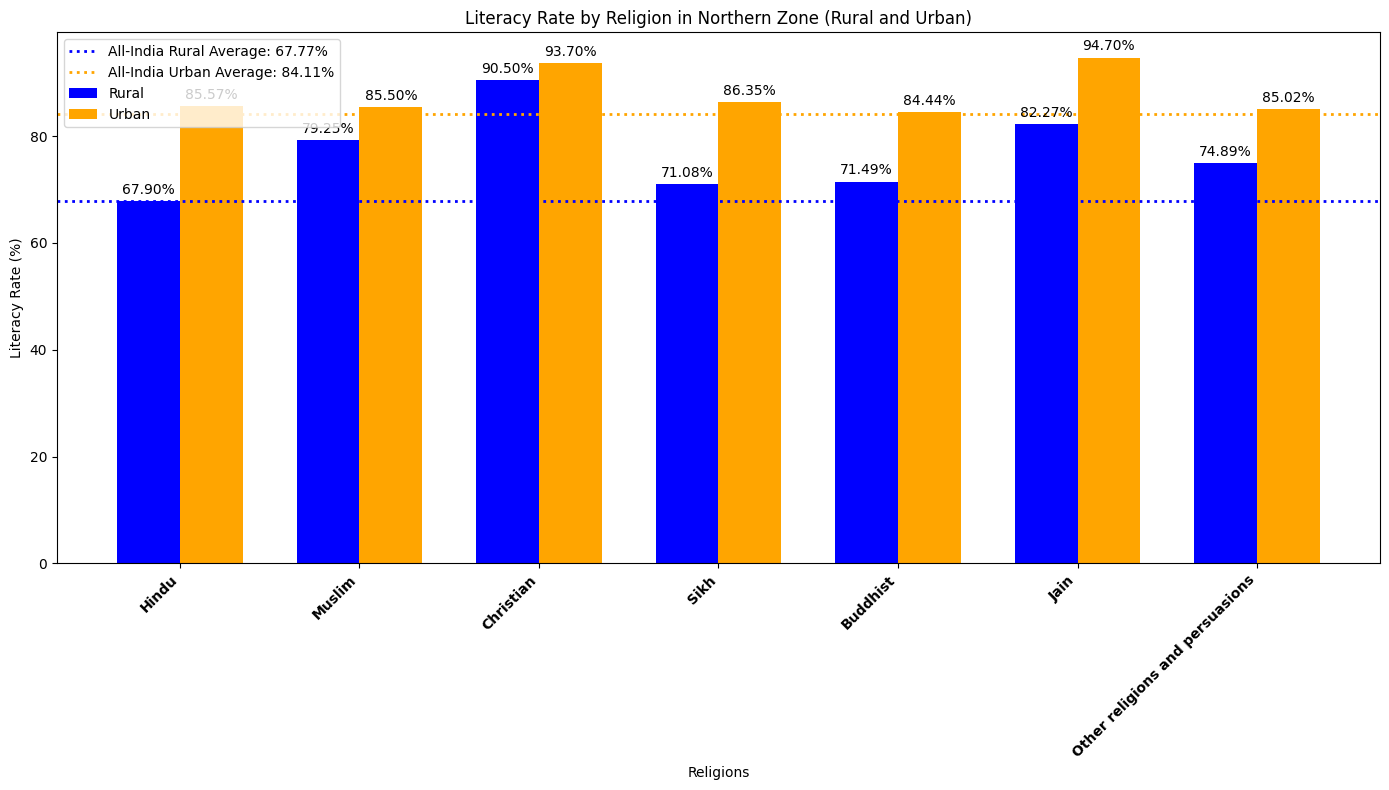

In [5]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `North Eastern ZONE` (Age 7 and above*)


In [2]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\North-Eastern_Zone_Raw.csv")
print(df['State'].value_counts())
df

State
ARUNACHAL PRADESH    266
MANIPUR              266
MIZORAM              266
TRIPURA              266
ASSAM                266
SIKKIM               266
NAGALAND             266
MEGHALAYA            266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,12,Rural,ARUNACHAL PRADESH,Hindu,7,6089,3263
1,12,Rural,ARUNACHAL PRADESH,Hindu,8,6448,4257
2,12,Rural,ARUNACHAL PRADESH,Hindu,9,5476,4030
3,12,Rural,ARUNACHAL PRADESH,Hindu,10,6969,5180
4,12,Rural,ARUNACHAL PRADESH,Hindu,11,5623,4491
...,...,...,...,...,...,...,...
2123,17,Urban,MEGHALAYA,Other religions and persuasions,25-29,2459,2294
2124,17,Urban,MEGHALAYA,Other religions and persuasions,30-34,1975,1798
2125,17,Urban,MEGHALAYA,Other religions and persuasions,35-59,5762,4917
2126,17,Urban,MEGHALAYA,Other religions and persuasions,60+,1501,972


## Filtering out Specific data

In [3]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,16786003,12737204,75.88,8398682,5121531,60.98,5208112,3792150,72.81,...,90.34,459998,301672,65.58,4470,3414,76.38,594185,387327,65.19
1,Urban,4910323,4434095,90.30,859415,673807,78.40,1411362,1313682,93.08,...,93.44,74339,65327,87.88,25248,24558,97.27,164834,143836,87.26


### Saving filtered data

In [4]:
output_file_path = "North-Eastern_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to North-Eastern_Zone_Specific.csv


### Analysis

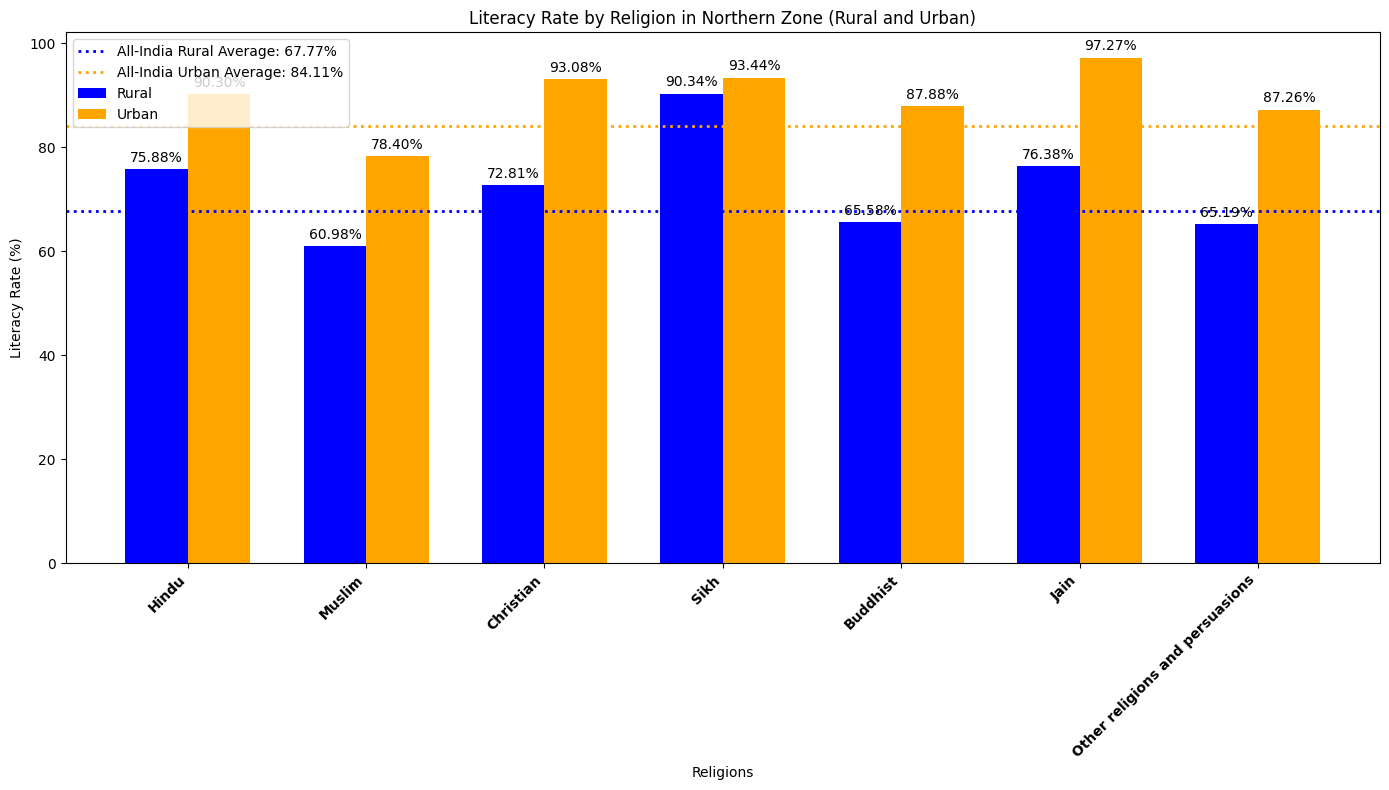

In [5]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()
